In [3]:
%pip install matplotlib
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


In [5]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

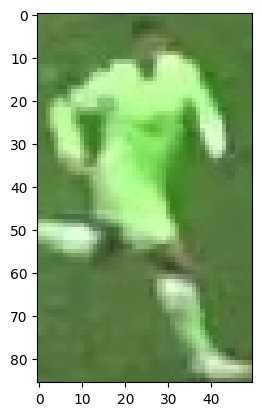

In [6]:
plt.imshow(image)
plt.show()

# Take the top half of the image


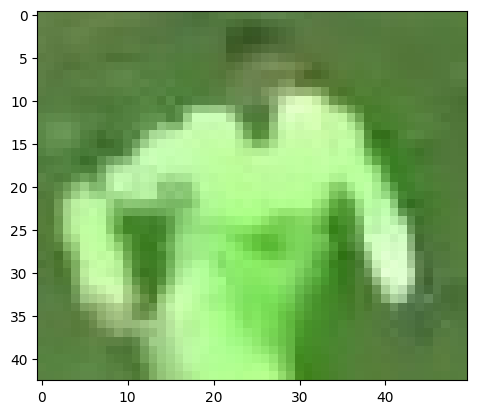

In [7]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two clusters

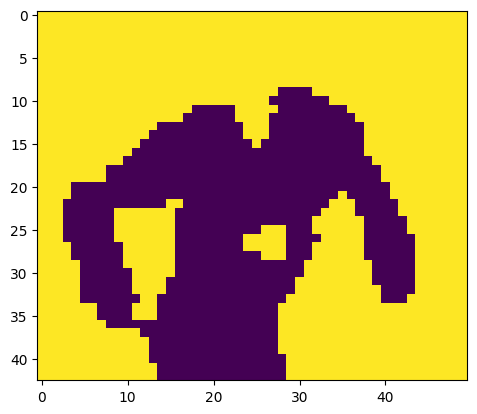

In [9]:
# reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters, # random state = 0 so we can replicate the results

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels

labels = kmeans.labels_

# reshape the labels into the original image shape

clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# display the clustered image

plt.imshow(clustered_image)
plt.show()

In [10]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [11]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [ ]:
kmeans.cluster_centers_[player_cluster]  # R, G, B test

array([171.15171504, 235.44327177, 142.55804749])